In [7]:

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# ADD MORE RELEVANT COMMENTS TO MAKE PRESENTATION EASIER

In [8]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

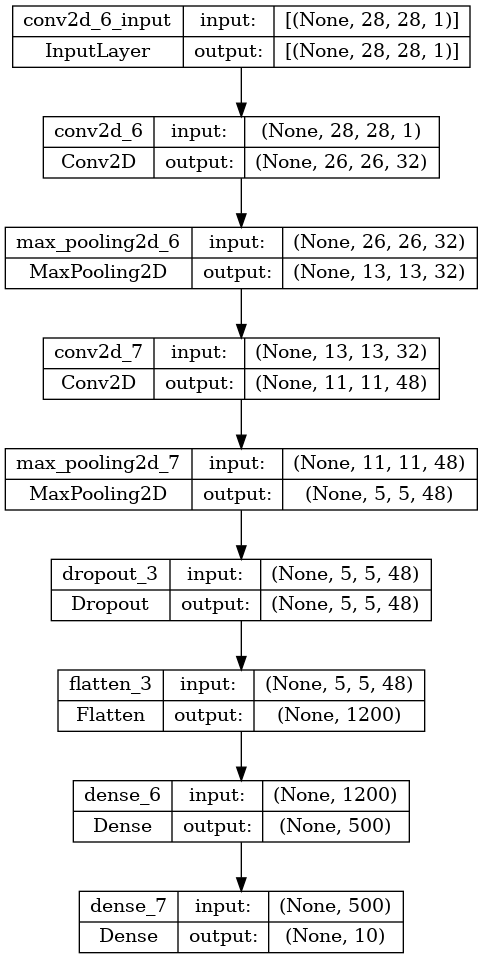

In [12]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 21s - loss: 1.0358 - accuracy: 0.8656 - val_loss: 0.0843 - val_accuracy: 0.9748 - 21s/epoch - 51ms/step
Epoch 2/10
422/422 - 22s - loss: 0.1690 - accuracy: 0.9475 - val_loss: 0.0645 - val_accuracy: 0.9812 - 22s/epoch - 52ms/step
Epoch 3/10
422/422 - 26s - loss: 0.1261 - accuracy: 0.9601 - val_loss: 0.0531 - val_accuracy: 0.9842 - 26s/epoch - 62ms/step
Epoch 4/10
422/422 - 22s - loss: 0.1013 - accuracy: 0.9686 - val_loss: 0.0440 - val_accuracy: 0.9860 - 22s/epoch - 52ms/step
Epoch 5/10
422/422 - 30s - loss: 0.0851 - accuracy: 0.9724 - val_loss: 0.0336 - val_accuracy: 0.9903 - 30s/epoch - 72ms/step
Epoch 6/10
422/422 - 22s - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0394 - val_accuracy: 0.9890 - 22s/epoch - 51ms/step
Epoch 7/10
422/422 - 36s - loss: 0.0663 - accuracy: 0.9788 - val_loss: 0.0345 - val_accuracy: 0.9905 - 36s/epoch - 84ms/step
Epoch 8/10
422/422 - 32s - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0318 - val_accuracy: 0.9895 - 32s/epoch - 76ms/step


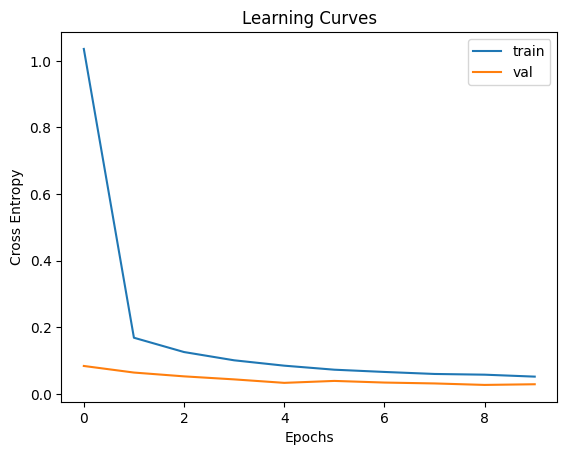

In [14]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [15]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.90999794006348
